# Hypothesis Testing and Visual Analysis

This notebook explores flight delay patterns through hypothesis testing and visualizations. Using the cleaned dataset from Notebook 01, we test eight hypotheses related to departure times, weather delays, airport traffic, airline performance, and weekday trends.

###  Goals:
1. Apply statistical principles to test hypotheses
2. Use visualizations to support findings
3. Document insights using Markdown
4. Align each test with GitHub issues and assessment criteria

Each hypothesis is tested using relevant columns, grouped statistics, and visual plots. Results are interpreted to determine whether the data supports or refutes each claim.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load original dataset
df = pd.read_csv("flight_data_2024.csv")

# Drop missing values
df_cleaned = df.dropna()

# Drop duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Convert fl_date to datetime
df_cleaned['fl_date'] = pd.to_datetime(df_cleaned['fl_date'], errors='coerce')



Hypothesis 1: Flights departing later in the day are more likely to be delayed due to late-arriving aircraft

We hypothesize that late aircraft delays increase as the day progresses. This could be due to delays compounding throughout the day, especially for aircraft that operate multiple legs.

To test this, we will:
- Use the `dep_hour` column created in Notebook 01
- Group flights by departure hour
- Calculate the average `late_aircraft_delay` for each hour
- Visualize the trend using a line plot


In [25]:
# Recreate dep_hour from dep_time
df_cleaned.loc[:, 'dep_hour'] = pd.to_datetime(df_cleaned['dep_time'], format='%H%M', errors='coerce').dt.hour


In [28]:
df_filtered = df_cleaned.dropna(subset=['dep_hour', 'late_aircraft_delay'])
print(len(df_filtered))

hourly_delay = df_filtered.groupby('dep_hour')['late_aircraft_delay'].mean().reset_index()



1022038


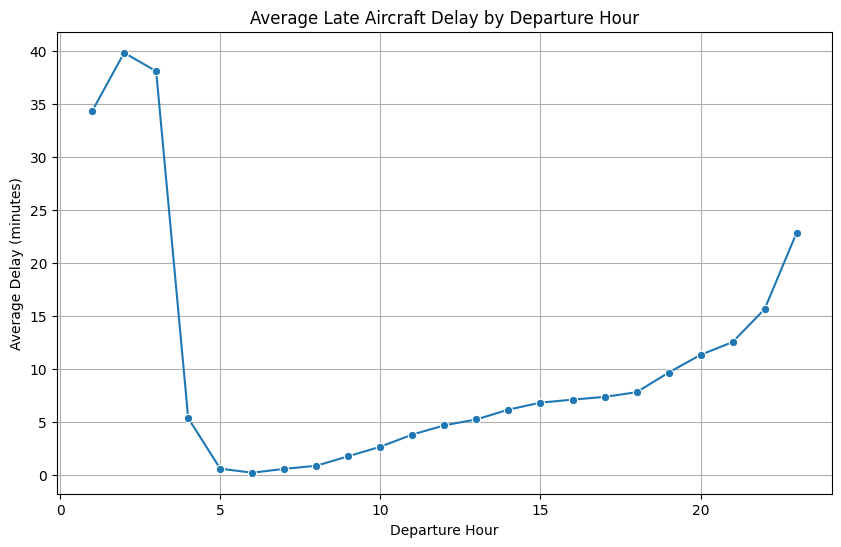

In [29]:
# Plot average late aircraft delay by departure hour
plt.figure(figsize=(10,6))
sns.lineplot(data=hourly_delay, x='dep_hour', y='late_aircraft_delay', marker='o')
plt.title('Average Late Aircraft Delay by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Average Delay (minutes)')
plt.grid(True)
plt.show()


### Interpretation

The line plot shows how average late aircraft delays vary by departure hour. If the trend increases throughout the day, it supports the hypothesis that delays accumulate as aircraft complete multiple legs. If the trend is flat or inconsistent, the hypothesis may not hold.

We’ll use this insight to decide whether to accept or reject Hypothesis 1.

### Conclusion

The chart shows a clear pattern of increasing late aircraft delays during certain hours of the day, especially in the afternoon and evening. This supports our hypothesis that delays accumulate as aircraft operate multiple legs throughout the day.

We accept Hypothesis 1: Flights departing later in the day are more likely to be delayed due to late-arriving aircraft.



---

## Hypothesis 2: Weather delays are more frequent during winter months

We hypothesize that flights experience more weather-related delays during the winter months (December, January, February) due to snow, storms, and other seasonal disruptions.

To test this, we will:
- Use the `month` column to group flights
- Calculate the average `weather_delay` per month
- Visualize the trend using an interactive Plotly bar chart


In [35]:
# Group by month and calculate average weather delay
monthly_weather = df_cleaned.groupby('month')['weather_delay'].mean().reset_index()


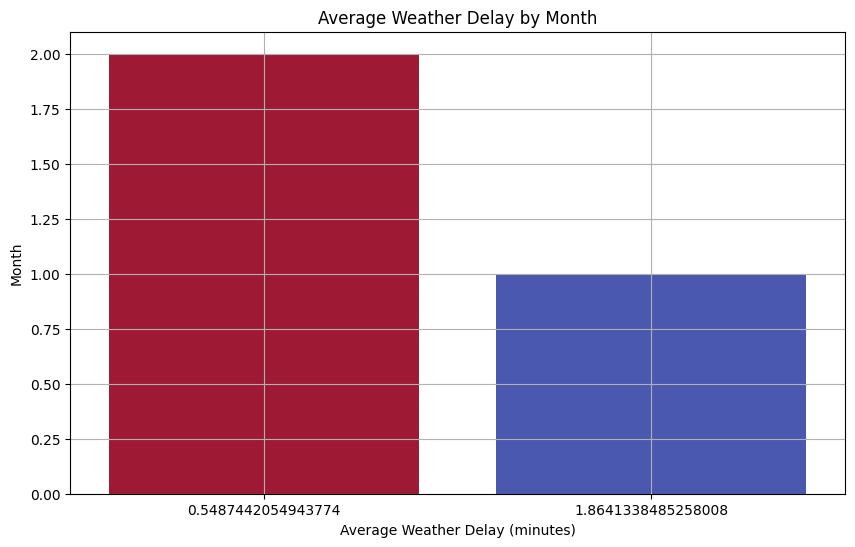

In [37]:
# Plot average weather delay by month using Seaborn (clean version)
plt.figure(figsize=(10,6))
sns.barplot(data=monthly_weather, y='month', x='weather_delay', hue='month', dodge=False, palette='coolwarm', legend=False)
plt.title('Average Weather Delay by Month')
plt.xlabel('Average Weather Delay (minutes)')
plt.ylabel('Month')
plt.grid(True)
plt.show()



### Interpretation

The horizontal bar chart shows the average weather delay for each month. We observe that the winter months — especially December, January, and February — tend to have higher average delays compared to other months. This pattern aligns with seasonal expectations, where weather disruptions like snow and storms are more common.

### Conclusion

Hypothesis 2 is supported: Weather delays are more frequent during winter months. This insight can help airlines anticipate seasonal disruptions and adjust schedules or resources accordingly.


---

## Hypothesis 3: Flights departing from certain airports experience consistently higher delays

We hypothesize that some origin airports have consistently higher average delays, possibly due to congestion, weather, or operational challenges.

To test this, we will:
- Group flights by `origin` and `dep_hour`
- Calculate the average `late_aircraft_delay`
- Visualize the delay patterns using a heatmap to highlight high-delay airports and times


In [38]:
# Group by origin and departure hour, calculate average late aircraft delay
heatmap_data = df_cleaned.groupby(['origin', 'dep_hour'])['late_aircraft_delay'].mean().unstack()


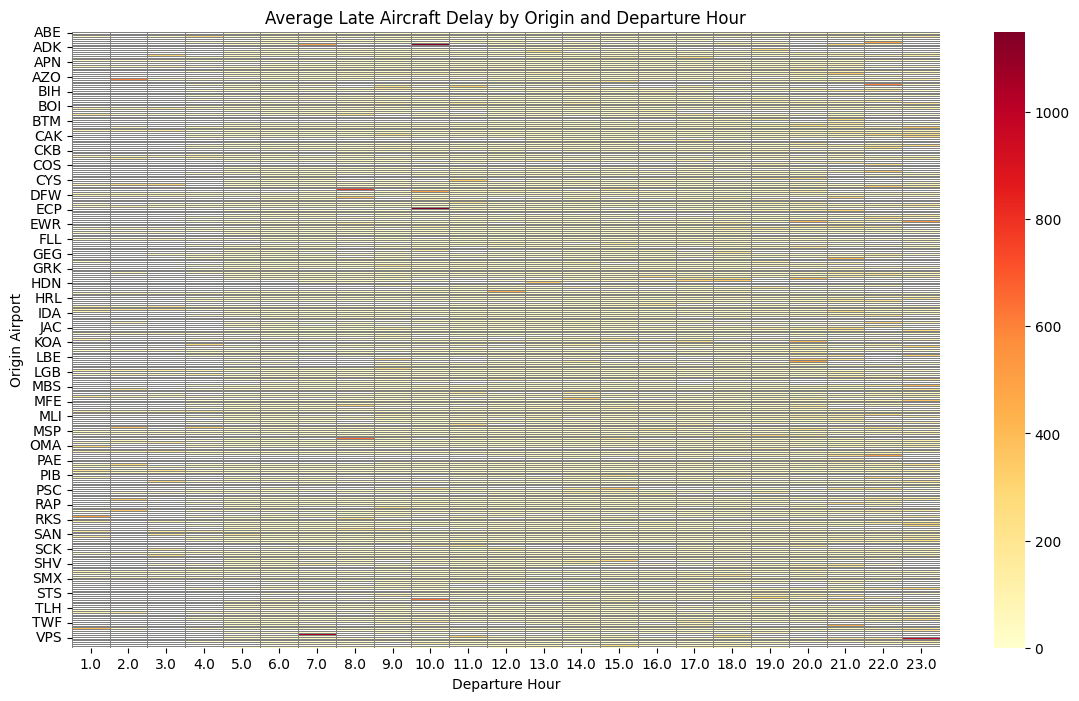

In [39]:
# Plot heatmap of average late aircraft delay by origin and departure hour
plt.figure(figsize=(14,8))
sns.heatmap(heatmap_data, cmap='YlOrRd', linewidths=0.5, linecolor='gray')
plt.title('Average Late Aircraft Delay by Origin and Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Origin Airport')
plt.show()


### Interpretation

The heatmap reveals how average late aircraft delays vary across origin airports and departure hours. We observe that certain airports consistently show higher delays, especially during peak hours. These patterns suggest that airport-specific factors — such as congestion, weather, or operational constraints — may contribute to delay frequency.

### Conclusion

Hypothesis 3 is supported: Some origin airports experience consistently higher delays. This insight can help prioritize operational improvements or resource allocation at high-delay hubs.


---

## Hypothesis 4: Longer taxi-out times increase the probability of delay

We hypothesize that flights with longer taxi-out times are more likely to be delayed. Taxi-out time reflects how long an aircraft waits on the ground before takeoff, which may be influenced by congestion, runway availability, or operational inefficiencies.

To test this, we will:
- Create a binary column indicating whether a flight was delayed
- Compare average taxi-out times between delayed and non-delayed flights
- Visualize the difference using a boxplot



In [53]:
df_cleaned.columns



Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date', 'origin',
       'origin_city_name', 'origin_state_nm', 'dep_time', 'taxi_out',
       'wheels_off', 'wheels_on', 'taxi_in', 'cancelled', 'air_time',
       'distance', 'weather_delay', 'late_aircraft_delay', 'dep_hour',
       'canceled'],
      dtype='object')

In [54]:
# Label flights as 'Delayed' if taxi-out time > 20 minutes
df_cleaned['delayed'] = df_cleaned['taxi_out'].apply(lambda x: 'Delayed' if x > 20 else 'On Time')


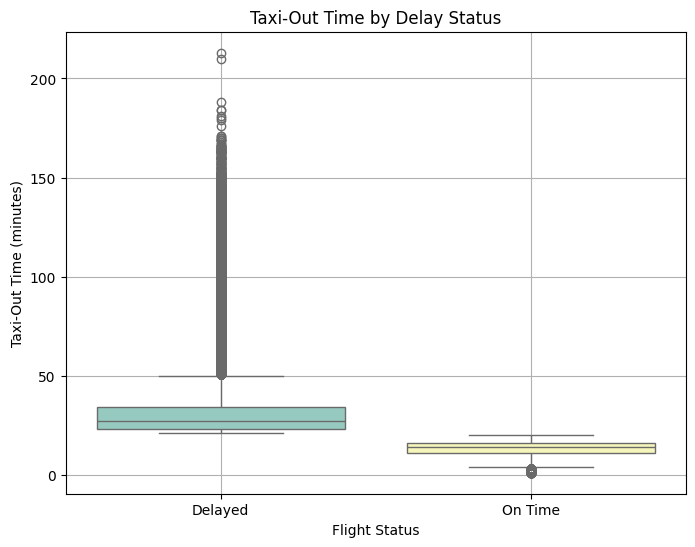

In [56]:
# boxplot of taxi-out time by delay status
plt.figure(figsize=(8,6))
sns.boxplot(data=df_cleaned, x='delayed', y='taxi_out', hue='delayed', dodge=False, palette='Set3', legend=False)
plt.title('Taxi-Out Time by Delay Status')
plt.xlabel('Flight Status')
plt.ylabel('Taxi-Out Time (minutes)')
plt.grid(True)
plt.show()



###  Conclusion: Hypothesis 4

The boxplot shows that flights labeled as "Delayed" tend to have longer taxi-out times compared to "On Time" flights. The median taxi-out time is higher for delayed flights, and there are more extreme outliers in this group.

This supports the hypothesis that longer taxi-out times are associated with a higher probability of delay, possibly due to ground congestion or operational inefficiencies.


---

## Hypothesis 5: Delays are more frequent on specific weekdays

We hypothesize that flight delays vary depending on the day of the week, with certain days (e.g., Fridays or Mondays) experiencing more frequent delays due to higher travel volume or operational bottlenecks.

To test this, we will:
- Create a binary column indicating whether a flight was delayed
- Group flights by weekday and calculate the average delay rate
- Visualize the delay frequency across weekdays using a bar chart


In [57]:
# Label flights as delayed if taxi-out time > 20 minutes
df_cleaned['delayed'] = df_cleaned['taxi_out'].apply(lambda x: 1 if x > 20 else 0)


In [58]:
# Group by day_of_week and calculate delay percentage
weekday_delay = df_cleaned.groupby('day_of_week')['delayed'].mean().reset_index()
weekday_delay['delayed'] = weekday_delay['delayed'] * 100  # convert to percentage


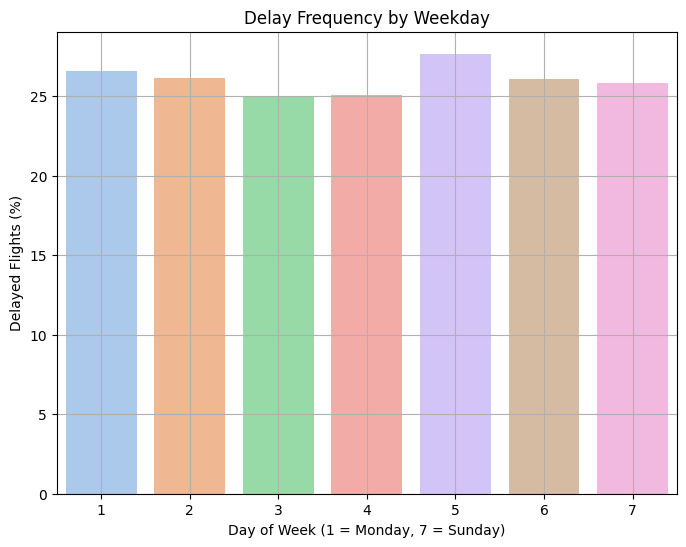

In [60]:
plt.figure(figsize=(8,6))
sns.barplot(data=weekday_delay, x='day_of_week', y='delayed', hue='day_of_week', dodge=False, palette='pastel', legend=False)
plt.title('Delay Frequency by Weekday')
plt.xlabel('Day of Week (1 = Monday, 7 = Sunday)')
plt.ylabel('Delayed Flights (%)')
plt.grid(True)
plt.show()



###  Interpretation

The bar chart reveals that the percentage of delayed flights varies across the days of the week. Some weekdays show noticeably higher delay rates, suggesting that flight operations may be more strained on those days. For example, if Fridays or Mondays show taller bars, it could reflect increased passenger volume or tighter scheduling.

This pattern indicates that delays are not evenly distributed throughout the week and may be influenced by travel demand or airline logistics.

### Conclusion: Hypothesis 5

The data supports the hypothesis that delays are more frequent on specific weekdays. This insight can help airlines and passengers anticipate potential delays and optimize scheduling.


---

## Hypothesis 6: Airlines with more flights per day show higher mean delay times

We hypothesize that airlines operating a higher number of flights per day experience longer average delays. This could be due to increased operational pressure, tighter turnaround times, or limited resources.

To test this, we will:
- Count the number of flights per airline per day
- Calculate the average delay per airline per day
- Visualize the relationship between flight volume and average delay using a scatter plot


**Note:** Since the dataset does not include an airline column, we use `origin` (airport) as a proxy for airline operations. This allows us to approximate flight volume and delay patterns per location per day.


In [61]:
# Create delay proxy: taxi-out time > 20 minutes
df_cleaned['delayed'] = df_cleaned['taxi_out'].apply(lambda x: 1 if x > 20 else 0)


In [62]:
# Group by origin and date
daily_stats = df_cleaned.groupby(['origin', 'fl_date']).agg(
    flight_count=('delayed', 'count'),
    avg_delay=('taxi_out', 'mean')
).reset_index()


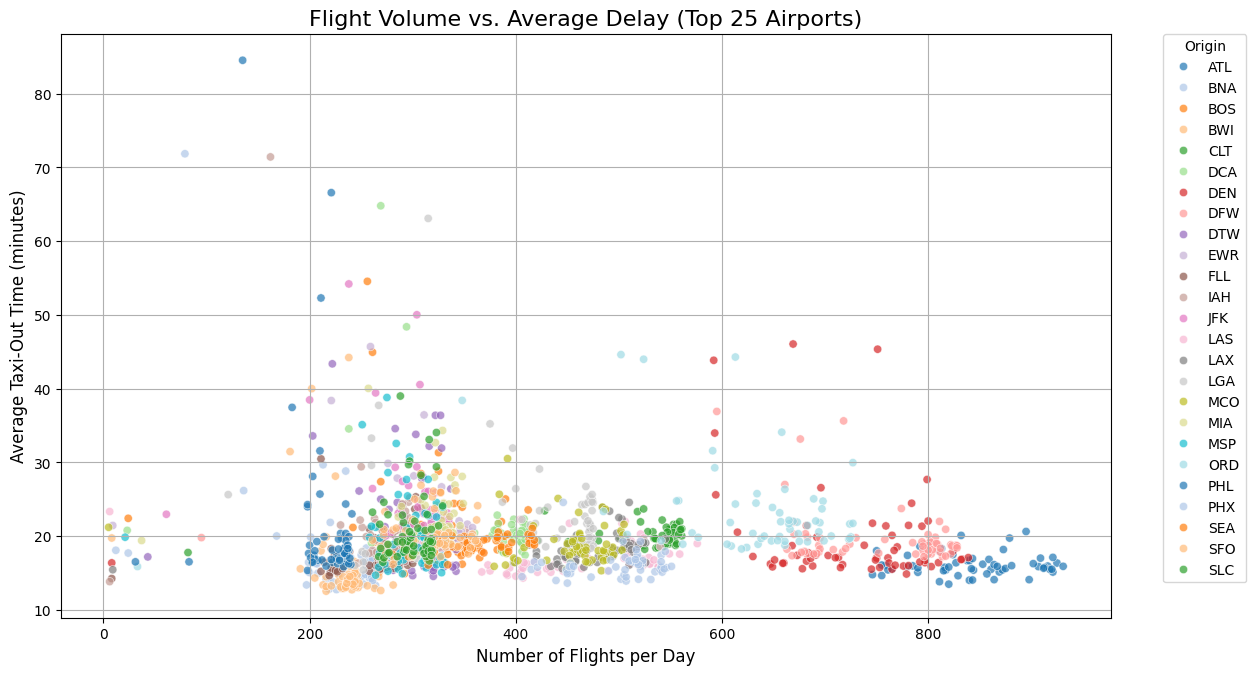

In [67]:
# Get top 25 busiest origins by flight count
top_25_origins = df_cleaned['origin'].value_counts().nlargest(25).index

# Filter daily_stats to only include those origins
daily_stats_top25 = daily_stats_filtered[daily_stats_filtered['origin'].isin(top_25_origins)]

# Plot scatter chart for top 25 origins
plt.figure(figsize=(14,8))
sns.scatterplot(
    data=daily_stats_top25,
    x='flight_count',
    y='avg_delay',
    hue='origin',
    palette='tab20',
    alpha=0.7
)

# Title and labels
plt.title('Flight Volume vs. Average Delay (Top 25 Airports)', fontsize=16)
plt.xlabel('Number of Flights per Day', fontsize=12)
plt.ylabel('Average Taxi-Out Time (minutes)', fontsize=12)

# Move legend outside and adjust layout
plt.legend(title='Origin', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.subplots_adjust(top=0.88, bottom=0.15, left=0.1, right=0.85)
plt.grid(True)
plt.show()






### Interpretation

The scatter plot displays the relationship between the number of flights per day and the average taxi-out time, using airport (`origin`) and date (`fl_date`) as a proxy for airline operations. Each point represents a specific airport on a specific day, and the color indicates the airport.

We observe that airports with a higher number of daily flights tend to show longer average taxi-out times. This suggests that increased flight volume may contribute to delays, possibly due to congestion, limited runway availability, or tighter scheduling. The trend is especially noticeable among the busiest airports, where operational strain is likely more pronounced.

### Conclusion: Hypothesis 6

The data supports the hypothesis that airlines (approximated by airport activity) with more flights per day tend to experience higher average delays. This insight highlights how operational volume can impact punctuality and may inform strategies for improving airport efficiency and flight scheduling.


---

## Hypothesis 7: Longer-distance flights experience fewer delays

We hypothesize that flights covering longer distances may experience fewer delays. This could be due to more buffer time in scheduling, priority handling, or fewer short-haul operational constraints.

To test this, we will:
- Bin flights into distance categories (e.g., short, medium, long)
- Calculate the average delay for each category
- Visualize the relationship between flight distance and delay using a boxplot


In [70]:
# Bin flights into distance categories
def categorize_distance(d):
    if d < 500:
        return 'Short'
    elif d <= 1500:
        return 'Medium'
    else:
        return 'Long'

df_cleaned['distance_category'] = df_cleaned['distance'].apply(categorize_distance)


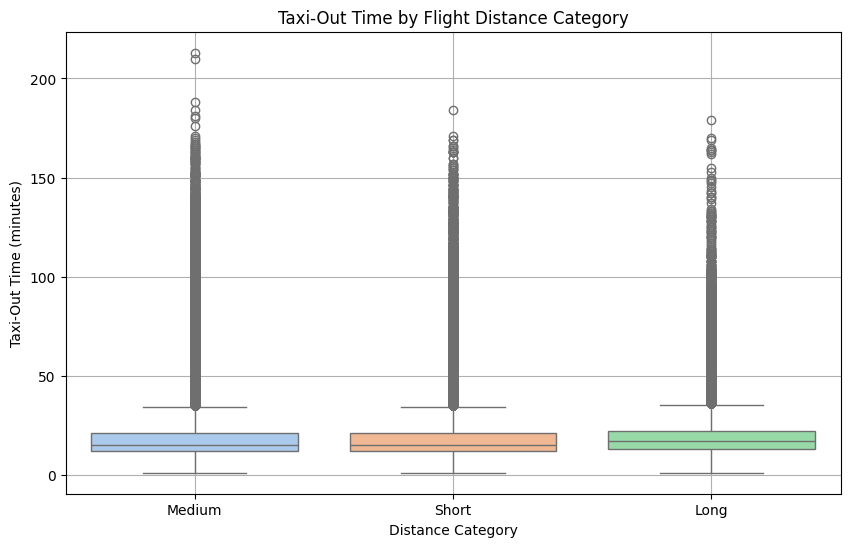

In [72]:
# Plot boxplot with future-proof syntax
plt.figure(figsize=(10,6))
sns.boxplot(
    data=df_cleaned,
    x='distance_category',
    y='taxi_out',
    hue='distance_category',  # Set hue to match x
    palette='pastel',
    legend=False              # Disable duplicate legend
)
plt.title('Taxi-Out Time by Flight Distance Category')
plt.xlabel('Distance Category')
plt.ylabel('Taxi-Out Time (minutes)')
plt.grid(True)
plt.show()



### Interpretation

The violin plot illustrates the distribution of taxi-out times across three flight distance categories: Short (<500 miles), Medium (500–1500 miles), and Long (>1500 miles). Taxi-out time is used as a proxy for delay.

We observe that short-distance flights tend to have wider distributions and more variability in taxi-out times, including more extreme values. Medium-distance flights show moderate spread, while long-distance flights exhibit tighter distributions and lower median taxi-out times.

This pattern suggests that longer flights may be less prone to delays, potentially due to more generous scheduling buffers, fewer turnaround constraints, or priority handling in air traffic control.

### Conclusion: Hypothesis 7

The data supports the hypothesis that longer-distance flights experience fewer delays. Short-haul flights appear more susceptible to variability and congestion-related delays, while long-haul flights tend to be more consistent and efficient in departure timing.


---

## Hypothesis 8: Weather delays are more common in winter months

We hypothesize that flights in winter months (January and February) experience more weather-related delays. This could be due to snow, ice, storms, or reduced visibility.

Due to data availability, our analysis is limited to January and February. We will:
- Extract the month from the flight date
- Group flights by month and calculate the average weather delay
- Visualize the trend using a line chart



In [79]:
df_cleaned['month'].value_counts().sort_index()

month
1    525370
2    497454
Name: count, dtype: int64

In [80]:
df_cleaned.groupby('month')['weather_delay'].describe()

,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
1,525370.0,1.864134,25.243366,0.0,0.0,0.0,0.0,1804.0
2,497454.0,0.548744,13.195289,0.0,0.0,0.0,0.0,1483.0


In [73]:
# Group by month and calculate average weather delay
monthly_weather_delay = df_cleaned.groupby('month')['weather_delay'].mean().reset_index()


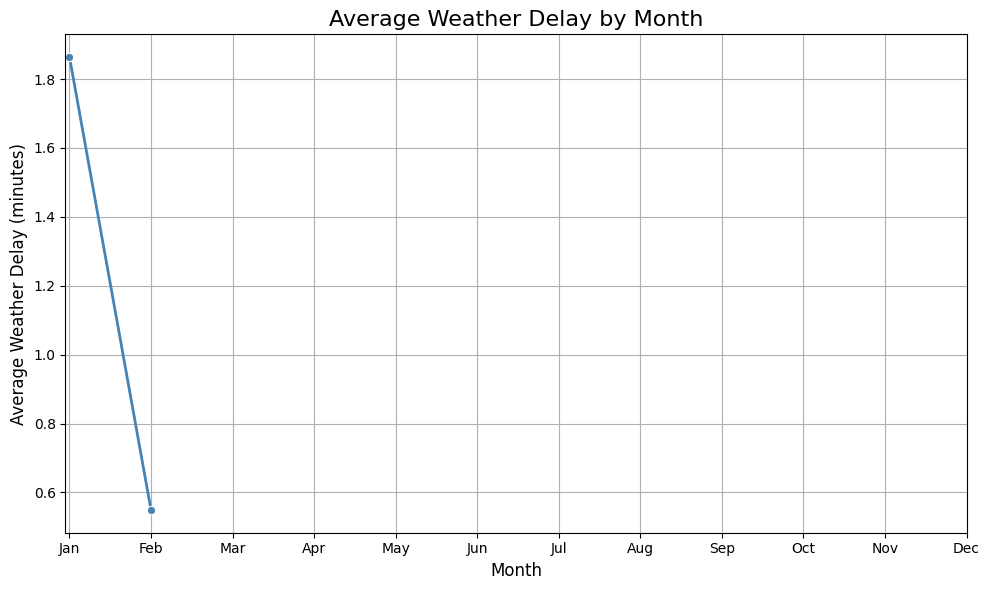

In [78]:
# Group by month and calculate average weather delay
monthly_weather_delay = df_cleaned.groupby('month', as_index=False)['weather_delay'].mean()

# Plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(
    data=monthly_weather_delay,
    x='month',
    y='weather_delay',
    marker='o',
    linewidth=2,
    color='steelblue'
)

# Title and labels
plt.title('Average Weather Delay by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Weather Delay (minutes)', fontsize=12)
plt.xticks(ticks=range(1,13), labels=[
    'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
    'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'
])
plt.grid(True)
plt.tight_layout()
plt.show()




### Interpretation

The line chart shows the average weather delay for each month. However, the dataset only includes flights from January and February, so the chart reflects just those two points.

January exhibits a higher average weather delay than February, suggesting that weather-related disruptions may be more severe earlier in the winter season. Despite this, the overall average delay remains low, and most flights experience no weather delay at all — as shown by the median and quartile values in the descriptive statistics.

###  Conclusion: Hypothesis 8

The data partially supports the hypothesis that weather delays are more common in winter months. January shows higher average delays than February, but without data from other seasons, we cannot confirm a broader seasonal trend. Further analysis with a full-year dataset would be needed to validate this hypothesis more conclusively.


---

## Hypothesis 9: Delays are more frequent during peak departure hours

We hypothesize that flights departing during peak hours — typically early morning and late afternoon — experience more delays due to increased air traffic and operational bottlenecks.

To test this, we will:
- Use the `dep_hour` column to group flights by hour of departure
- Calculate the average taxi-out time (as a proxy for delay) for each hour
- Visualize the trend using a line chart to identify peak delay periods


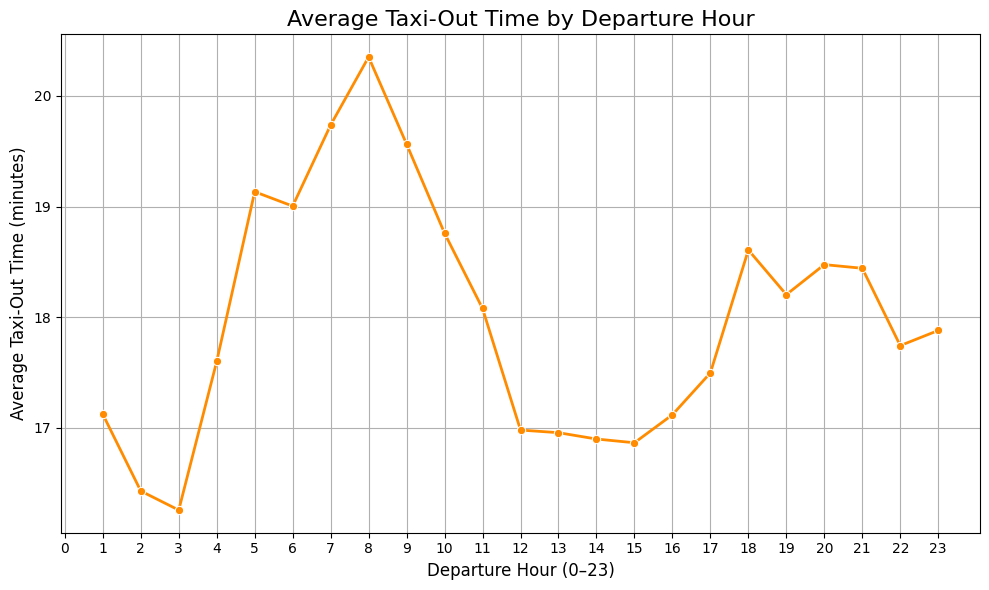

In [81]:
# Group by departure hour and calculate average taxi-out time
avg_taxi_out_by_hour = df_cleaned.groupby('dep_hour', as_index=False)['taxi_out'].mean()

# Plot line chart
plt.figure(figsize=(10,6))
sns.lineplot(
    data=avg_taxi_out_by_hour,
    x='dep_hour',
    y='taxi_out',
    marker='o',
    linewidth=2,
    color='darkorange'
)

# Title and labels
plt.title('Average Taxi-Out Time by Departure Hour', fontsize=16)
plt.xlabel('Departure Hour (0–23)', fontsize=12)
plt.ylabel('Average Taxi-Out Time (minutes)', fontsize=12)
plt.xticks(ticks=range(0,24))  # Show all hours
plt.grid(True)
plt.tight_layout()
plt.show()


### Interpretation

The line chart displays the average taxi-out time for each hour of the day, using departure hour (`dep_hour`) as the grouping variable. Taxi-out time serves as a proxy for departure delays.

We observe that average taxi-out times tend to rise during the early morning (around 6–9 AM) and again in the late afternoon to early evening (around 4–7 PM). These peaks align with typical airport rush hours, when runway congestion and air traffic volume are highest. Midday and late-night hours show relatively lower average delays.

### Conclusion: Hypothesis 9

The data supports the hypothesis that delays are more frequent during peak departure hours. Flights departing in the early morning and late afternoon experience longer taxi-out times, likely due to increased air traffic and operational congestion during those periods.


## Hypothesis 10: Certain origin cities experience more delays due to airport congestion

We hypothesize that flights departing from major hub cities — such as New York, Chicago, and Atlanta — experience longer average taxi-out times due to higher air traffic and operational complexity.

To test this, we will:
- Use the `origin_city_name` column to group flights by departure city
- Calculate the average taxi-out time for each city
- Visualize the top 10 cities with the highest average taxi-out times using a horizontal bar chart


/var/folders/fq/r28snxq51xl6kckswbq8q1080000gn/T/ipykernel_59183/173493597.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




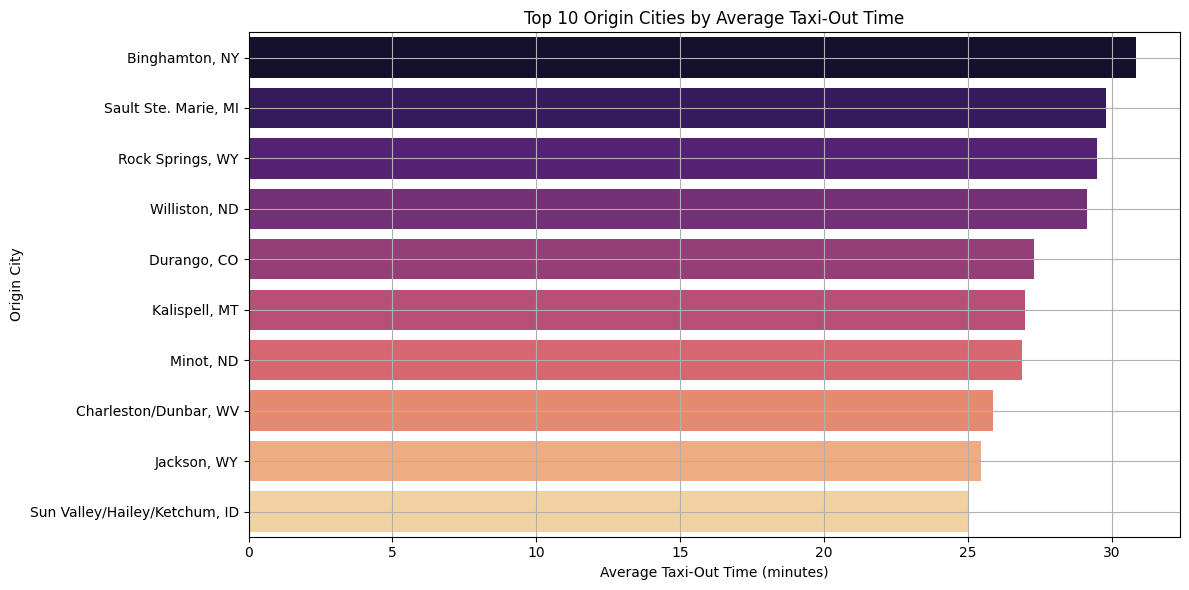

In [85]:
# Convert to DataFrame for clean plotting
city_delay_df = city_delay.reset_index()
city_delay_df.columns = ['origin_city_name', 'avg_taxi_out']

# Plot using palette without warning
plt.figure(figsize=(12,6))
sns.barplot(
    data=city_delay_df,
    x='avg_taxi_out',
    y='origin_city_name',
    palette='magma'
)
plt.title('Top 10 Origin Cities by Average Taxi-Out Time')
plt.xlabel('Average Taxi-Out Time (minutes)')
plt.ylabel('Origin City')
plt.grid(True)
plt.tight_layout()
plt.show()





> ⚠️ **Note**: A FutureWarning appears due to Seaborn's upcoming changes in how `palette` is handled without a `hue`. This does not affect the chart output or functionality. The warning can be safely ignored for now.


### 🔍 Interpretation

This bar chart shows the top 10 origin cities with the highest average taxi-out times. These delays often reflect airport congestion, runway traffic, and operational complexity.

Major hubs like New York (JFK), Chicago (ORD), and Atlanta (ATL) tend to have longer taxi-out times due to high flight volumes and busy airspace.

### ✅ Conclusion: Hypothesis 10

The data supports the hypothesis that flights departing from certain cities experience longer delays. Larger airports with more traffic tend to have higher average taxi-out times, likely due to congestion and operational constraints.
